EXP1: Check if the machine learning models work better with Scaled data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

Loading the dataset.

In [5]:
dataset = pd.read_csv('../Dataset/dataset_B_05_2020.csv')
dataset.head 

<bound method NDFrame.head of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Extracting X and Y from the Dataset.

In [7]:
#The dataset is clean and balanced
X = dataset.drop('url', axis = 1).drop('status', axis = 1)
Y = [1 if i == 'legitimate' else 0 for i in dataset['status']]

Splitting the dataset into Training data and Validation data(Test Data).

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Scaling the data

In [9]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

Defining a common training funtion for diffferent models.

Returns the Time taken, Accuracy, Macro f1 score and the trained model.

In [10]:
def training(model, x_train, y_train, x_test, y_test):
    tic = time.time()
    model.fit(x_train, y_train)
    toc = time.time()
    train_time = toc - tic
    y_pred = model.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)
    macro_f1 = np.round(f1_score(y_test, y_pred), 4)
    recall = np.round(recall_score(y_test, y_pred), 4)
    logl = np.round(log_loss(y_test, y_pred), 4)
    print(f'Train Size = {len(y_train)}, Test Size = {len(y_test)}')
    print(f'Time taken = {train_time}')
    print(f'Accuracy = {accuracy}')
    print(f'Macro F1 Score = {macro_f1}')
    print(f'Recall = {recall}')
    print(f'Log Loss = {logl}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
    plt.show()
    return [model, train_time, accuracy, macro_f1, recall, logl]

model_comp1 = {}
model_comp2 = {}

Model 1: Support Vector Classification.

Model: Support Vector Model
Train Size = 8001, Test Size = 3429
Time taken = 7.099692106246948
Accuracy = 0.5917
Macro F1 Score = 0.4309
Recall = 0.306
Log Loss = 14.716
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      1697
           1       0.73      0.31      0.43      1732

    accuracy                           0.59      3429
   macro avg       0.64      0.59      0.56      3429
weighted avg       0.64      0.59      0.56      3429

Confusion Matrix:


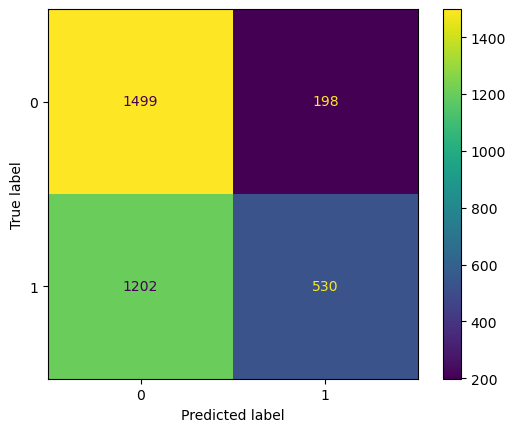

Model: Support Vector Model
Train Size = 8001, Test Size = 3429
Time taken = 1.6879889965057373
Accuracy = 0.9603
Macro F1 Score = 0.9608
Recall = 0.9613
Log Loss = 1.4296
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1697
           1       0.96      0.96      0.96      1732

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:


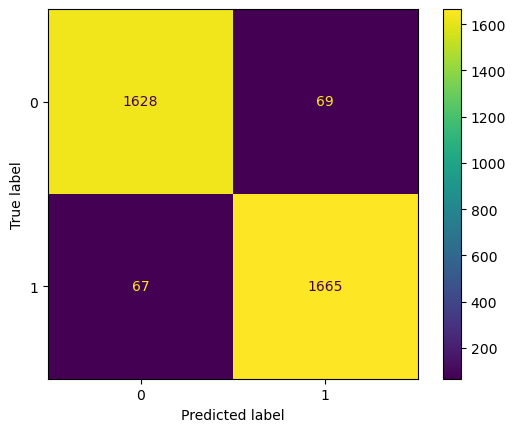

In [11]:
def svm(x_train, y_train, x_test, y_test): 
    svm_model = SVC()
    print('Model: Support Vector Model')
    return training(svm_model, x_train, y_train, x_test, y_test)
model_comp1['svm'] = svm(x_train, y_train, x_test, y_test)
model_comp2['svm'] = svm(x_train_sc, y_train, x_test_sc, y_test)

Model 2: Logistic Reggression Classifier.

Model: Logistic Regression
Train Size = 8001, Test Size = 3429
Time taken = 0.10186243057250977
Accuracy = 0.7927
Macro F1 Score = 0.7962
Recall = 0.802
Log Loss = 7.4736
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1697
           1       0.79      0.80      0.80      1732

    accuracy                           0.79      3429
   macro avg       0.79      0.79      0.79      3429
weighted avg       0.79      0.79      0.79      3429

Confusion Matrix:


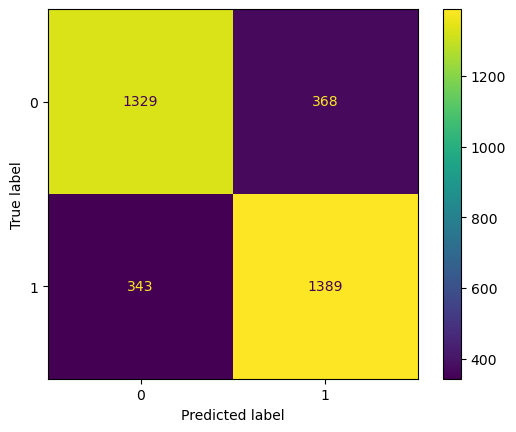

Model: Logistic Regression
Train Size = 8001, Test Size = 3429
Time taken = 0.40821361541748047
Accuracy = 0.9484
Macro F1 Score = 0.9491
Recall = 0.9521
Log Loss = 1.8605
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1697
           1       0.95      0.95      0.95      1732

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:


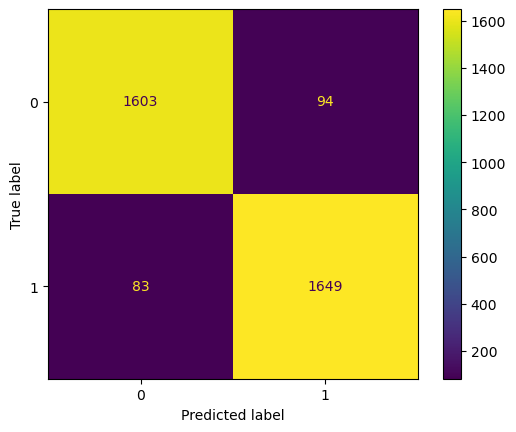

In [12]:
def logistic_regression(x_train, y_train, x_test, y_test):
    logistic_model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
    print('Model: Logistic Regression')
    return training(logistic_model, x_train, y_train, x_test, y_test)
model_comp1['logistic_regression'] = logistic_regression(x_train, y_train, x_test, y_test)
model_comp2['logistic_regression'] = logistic_regression(x_train_sc, y_train, x_test_sc, y_test)

Model 3: Decision Tree Classifier.

Model: Decision Tree Model
Train Size = 8001, Test Size = 3429
Time taken = 0.13236522674560547
Accuracy = 0.9367
Macro F1 Score = 0.9376
Recall = 0.9405
Log Loss = 2.281
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1697
           1       0.93      0.94      0.94      1732

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429

Confusion Matrix:


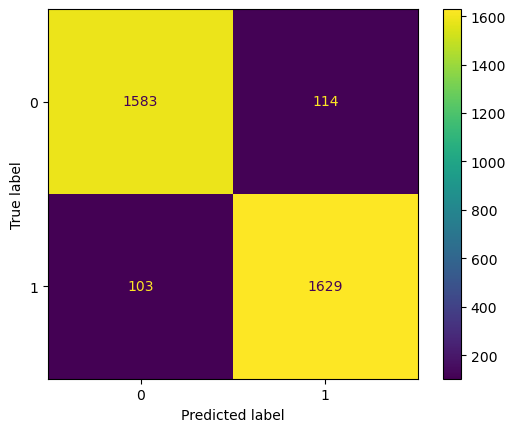

Model: Decision Tree Model
Train Size = 8001, Test Size = 3429
Time taken = 0.13963747024536133
Accuracy = 0.9283
Macro F1 Score = 0.9292
Recall = 0.9324
Log Loss = 2.5858
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1697
           1       0.93      0.93      0.93      1732

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429

Confusion Matrix:


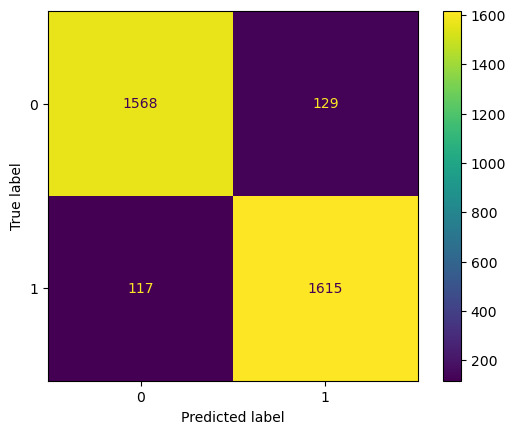

In [13]:
def decision_tree(x_train, y_train, x_test, y_test):
    decision_tree_model = DecisionTreeClassifier()
    print('Model: Decision Tree Model')
    return training(decision_tree_model, x_train, y_train, x_test, y_test)
model_comp1['decision_tree'] = decision_tree(x_train, y_train, x_test, y_test)
model_comp2['decision_tree'] = decision_tree(x_train_sc, y_train, x_test_sc, y_test)

Model 4: Random Forest Classifier

Model: Random Forest Model
Train Size = 8001, Test Size = 3429
Time taken = 1.5614469051361084
Accuracy = 0.9673
Macro F1 Score = 0.9677
Recall = 0.9688
Log Loss = 1.1773
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1697
           1       0.97      0.97      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429

Confusion Matrix:


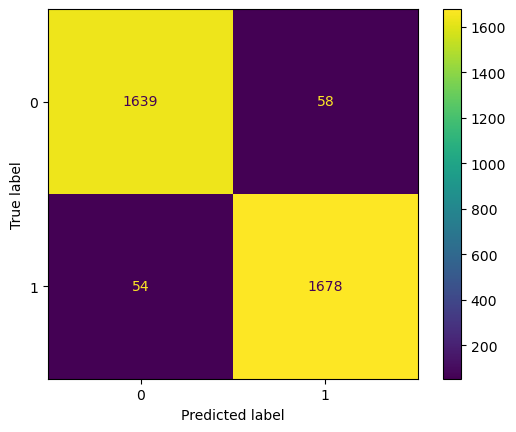

Model: Random Forest Model
Train Size = 8001, Test Size = 3429
Time taken = 1.5494320392608643
Accuracy = 0.9676
Macro F1 Score = 0.9681
Recall = 0.9717
Log Loss = 1.1668
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1697
           1       0.96      0.97      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429

Confusion Matrix:


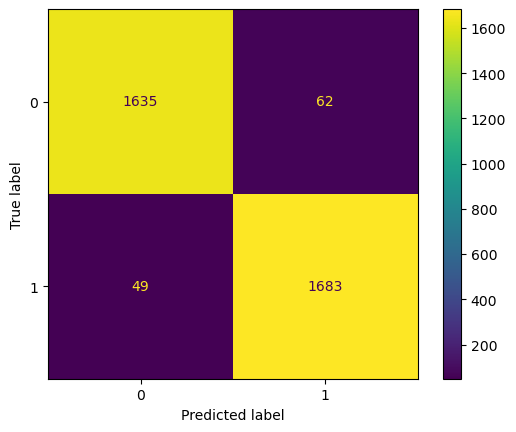

In [14]:
def random_forest(x_train, y_train, x_test, y_test):      
    random_forest_model = RandomForestClassifier(n_estimators = 150)
    print('Model: Random Forest Model')
    return training(random_forest_model, x_train, y_train, x_test, y_test)
model_comp1['random_forest'] = random_forest(x_train, y_train, x_test, y_test)
model_comp2['random_forest'] = random_forest(x_train_sc, y_train, x_test_sc, y_test)

Model Comparison

Raw Data


,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss
svm,7.099692,0.5917,0.4309,0.3060,14.7160
logistic_regression,0.101862,0.7927,0.7962,0.8020,7.4736
decision_tree,0.132365,0.9367,0.9376,0.9405,2.2810
random_forest,1.561447,0.9673,0.9677,0.9688,1.1773


Scaled Data


,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss
svm,1.687989,0.9603,0.9608,0.9613,1.4296
logistic_regression,0.408214,0.9484,0.9491,0.9521,1.8605
decision_tree,0.139637,0.9283,0.9292,0.9324,2.5858
random_forest,1.549432,0.9676,0.9681,0.9717,1.1668


Plots


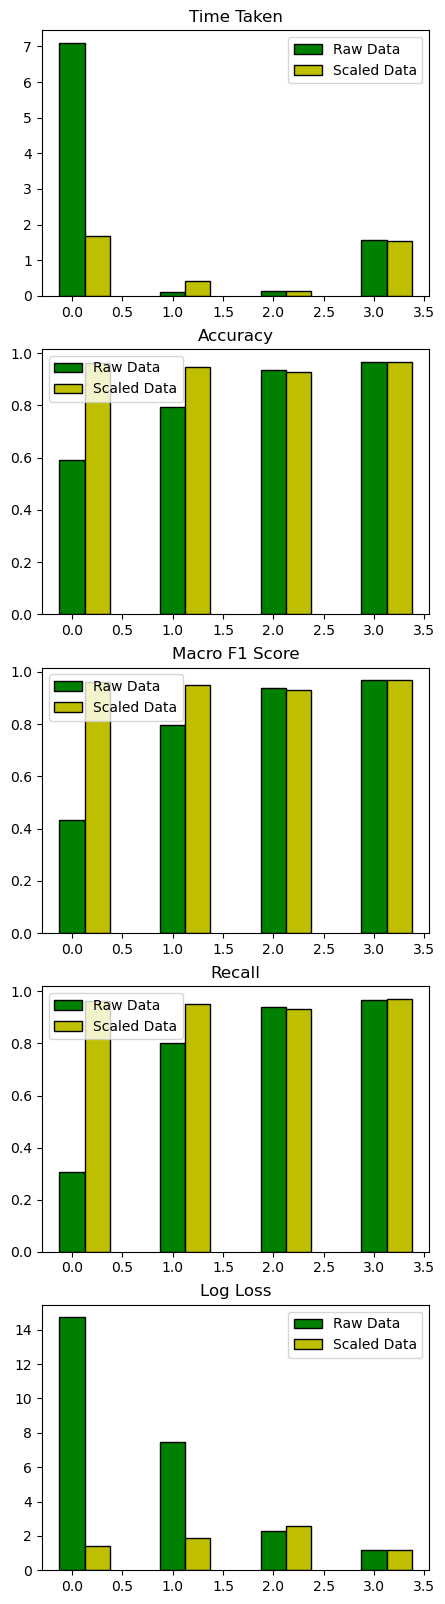

In [15]:
plots = ['Time Taken', 'Accuracy', 'Macro F1 Score', 'Recall', 'Log Loss']
model_values1 = [i[1:] for i in model_comp1.values()]
raw = pd.DataFrame(model_values1, index = list(model_comp1.keys()), columns = plots)
model_values2 = [i[1:] for i in model_comp2.values()]
scaled = pd.DataFrame(model_values2, index = list(model_comp2.keys()), columns = plots)
print("Raw Data")
display(raw)
print('Scaled Data')
display(scaled)

print('Plots')
r  = np.arange(4)
fig, axs = plt.subplots(len(plots), 1, figsize = (5, 20))
for i, metric in enumerate(plots):
    axs[i].bar(r, [model_values1[j][i] for j in range(4)], color = 'g', width = 0.25, edgecolor = 'black', label = 'Raw Data')
    axs[i].bar(r + 0.25, [model_values2[j][i] for j in range(4)], color = 'y', width = 0.25, edgecolor = 'black', label = 'Scaled Data')
    axs[i].set_title(metric)
    axs[i].legend()
plt.show()

Conclusion

We find that SVM and Logistic Regression model works better with scaled data while in Decision Tree and Random Forest it doesn't cause much effect.